In [1]:
using NamedTrajectories

In [2]:
Z = load("../data/multimode/g0_to_g1.jld2");

In [7]:
Z.names

(:ψ̃, :a, :da, :dda)

In [3]:
iso_to_ket(ψ̃::AbstractVector{Float64}) = ψ̃[1:div(length(ψ̃), 2)] + im * ψ̃[(div(length(ψ̃), 2) + 1):end]

iso_to_ket (generic function with 1 method)

In [4]:
function populations(
    ψ̃::AbstractVector{Float64};
    components=1:div(length(ψ̃), 2)
)
    ψ = iso_to_ket(ψ̃)
    return abs2.(ψ[components])
end

populations (generic function with 1 method)

In [5]:
ketdim = Z.dims.ψ̃ ÷ 2

transformations = Dict(
    :ψ̃ => [
        ψ̃ -> populations(ψ̃; components=[1,2]),
        ψ̃ -> populations(ψ̃; components=[ketdim ÷ 3, ketdim ÷ 3 * 2, ketdim]),
        ψ̃ -> populations(ψ̃; components=2 * (ketdim ÷ 3):ketdim)
    ], 
);

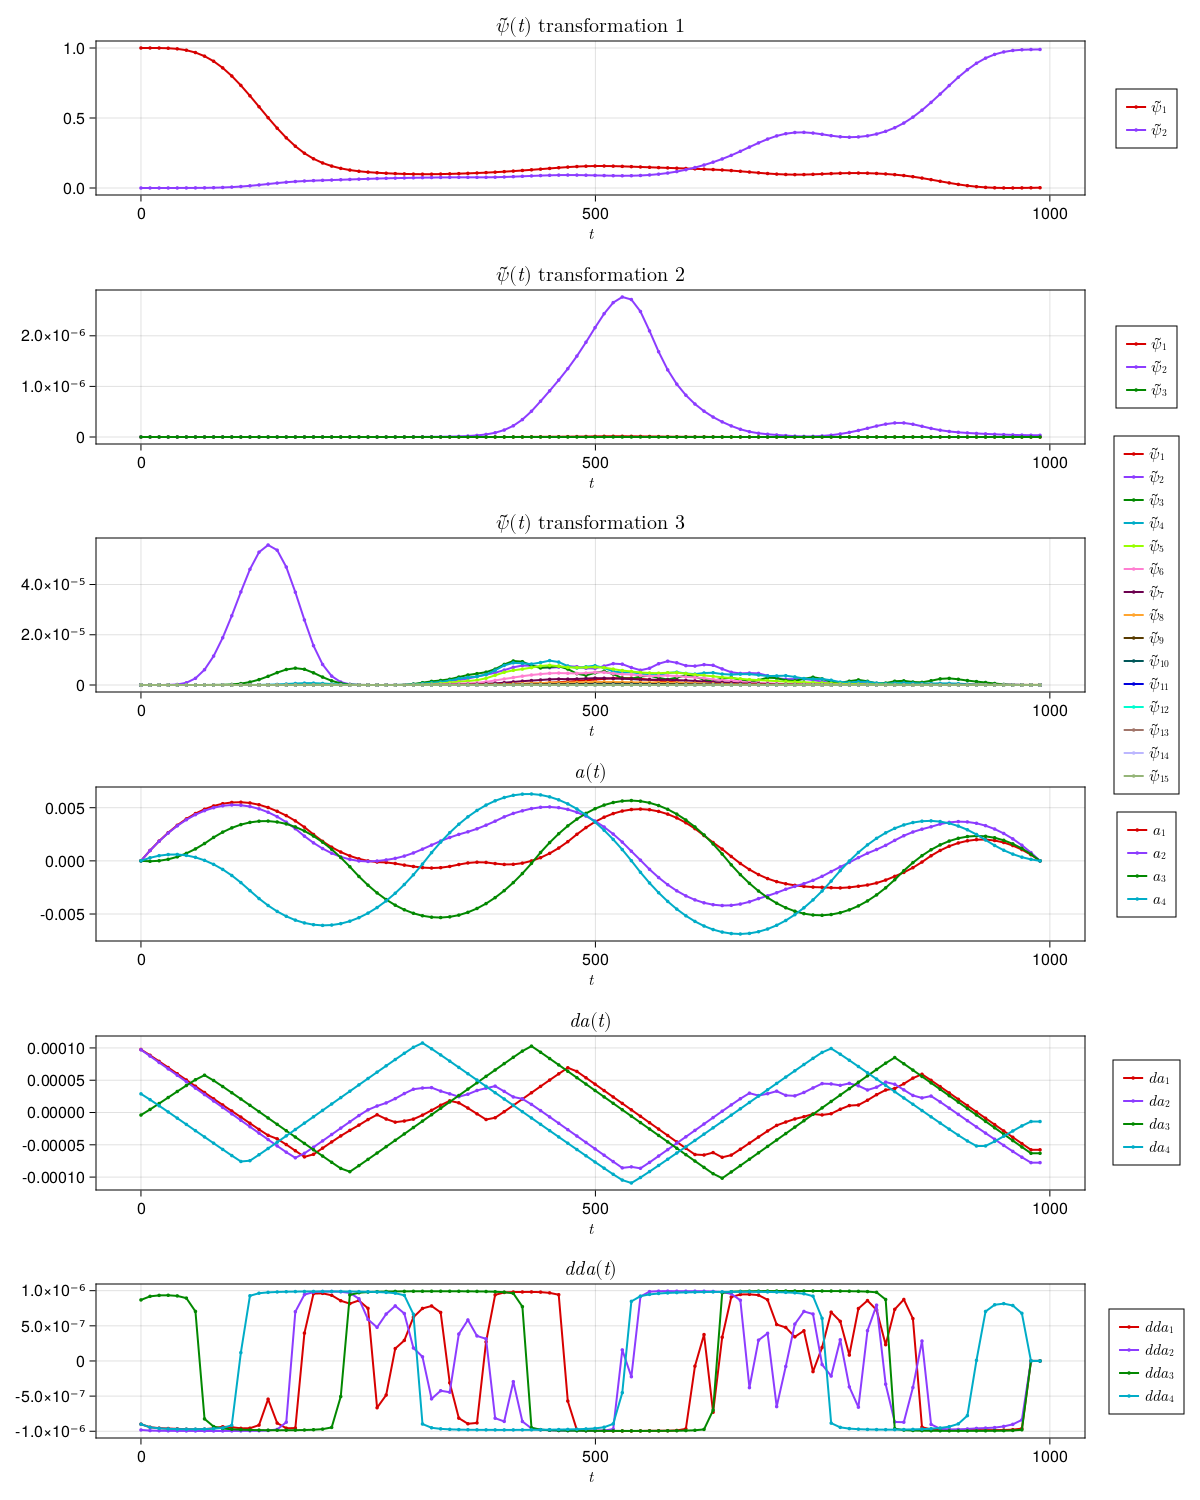

In [12]:
plot(
    Z, 
    [:a, :da, :dda]; 
    transformations=transformations, 
    res=(1200, 1500),
    titlesize=20,
    ignored_labels=:ψ̃
)

In [9]:
save_path = "plots/multimode_g0_to_g1.png"
plot(
    save_path,
    Z, 
    :a; 
    transformations=transformations, 
    res=(1200, 1000),
    titlesize=20,
    ignored_labels=:ψ̃
)

CairoMakie.Screen{IMAGE}
